In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [4]:
train = pd.read_csv('C:/Users/mncedisi.mncwabe/Downloads/loan_train.csv')
test = pd.read_csv('C:/Users/mncedisi.mncwabe/Downloads/loan_test.csv')


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
Loan_ID=pd.DataFrame(test.Loan_ID)

In [11]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
# percentage of missing values in train data

train_missing = train.isnull().sum()/len(train)*100
train_missing

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [13]:
# percentage of missing values in testdata

test_missing = test.isnull().sum()/len(test)*100
test_missing

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [14]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
# We can see that about 84% applicants have a credit_history.
# How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1
# for those who have a credit history and 0 otherwise)
# The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

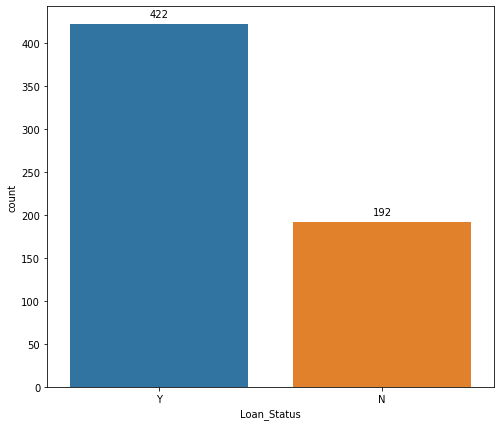

In [14]:
# check how many applicants have approved loan and how many were denied
plt.figure(figsize = (8,7))
plot = sns.countplot(x = 'Loan_Status',data = train)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [15]:
# most applicants (422) had their loan application approved

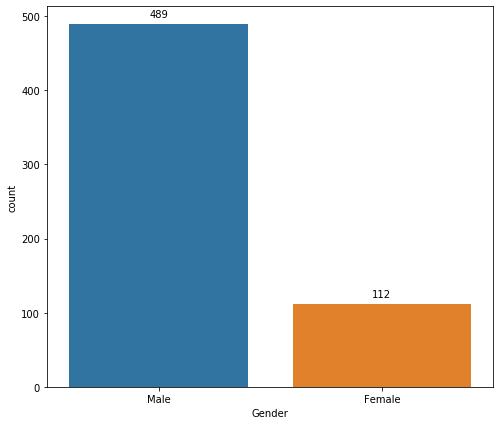

In [16]:
# let's check the distribution of applicants gender 

plt.figure(figsize = (8,7))
plot = sns.countplot(x = 'Gender',data = train)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [17]:
# Most of the loan applicants are Males

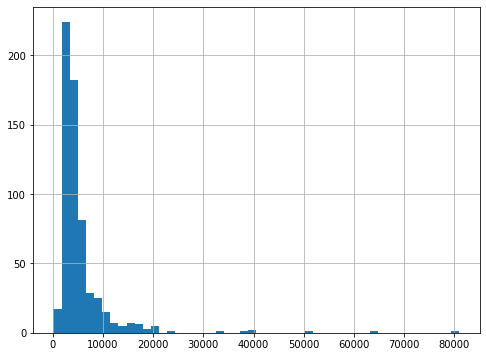

In [28]:
# Lets check the distribution of numerical variables
plt.figure(figsize = (8,6))
train['ApplicantIncome'].hist(bins = 50)

In [29]:
# it can be seen that most applicants are earning between 150 and 10000

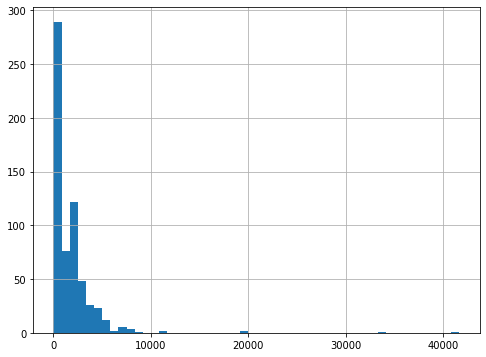

In [30]:
plt.figure(figsize = (8,6))
train['CoapplicantIncome'].hist(bins = 50)

In [31]:
# same as Co-applicants, most of them are earning between 0 and 10000
# we can also observe that there are few extreme values on both applicant income and co-applicant income. 
# This is also the reason why 50 bins are required to depict the distribution clearly.

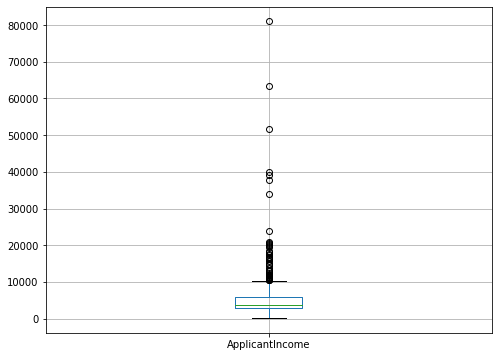

In [33]:
# Next, we look at box plots to understand the distributions.

plt.figure(figsize = (8,6))
train.boxplot(column = ('ApplicantIncome'))

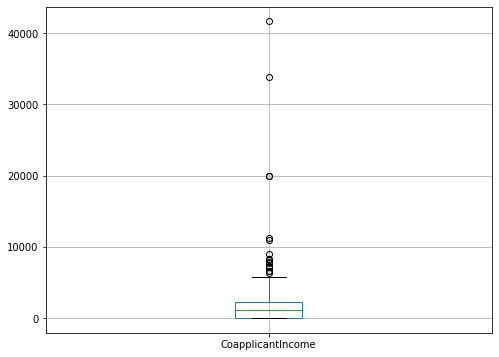

In [34]:
plt.figure(figsize = (8,6))
train.boxplot(column = ('CoapplicantIncome'))

In [35]:
# This confirms the presence of a lot of outliers/extreme values. 
# This can be attributed to the income difference in the society. 
# Part of this can be driven by the fact that we are looking at people with different education levels.
# Let us segregate them by Education:

<Figure size 576x432 with 0 Axes>

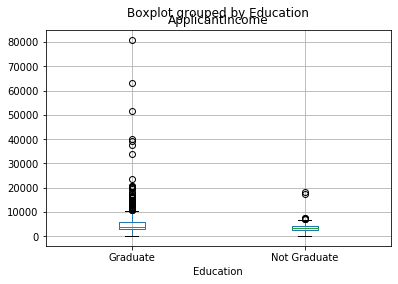

In [39]:
plt.figure(figsize = (8,6))
train.boxplot(column = 'ApplicantIncome',by = 'Education');

In [40]:
# We can see that there is no substantial different between the mean/average income of graduate and non-graduates. 
# But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

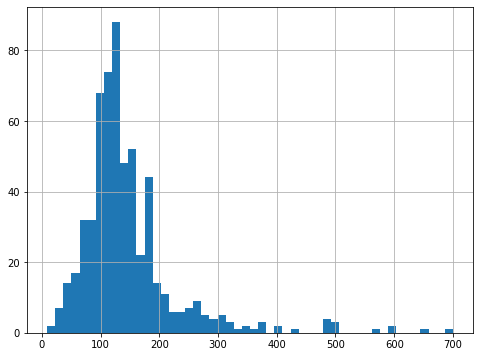

In [42]:
# Let's look at Loan amount distribution

plt.figure(figsize = (8,6))
train['LoanAmount'].hist(bins = 50)

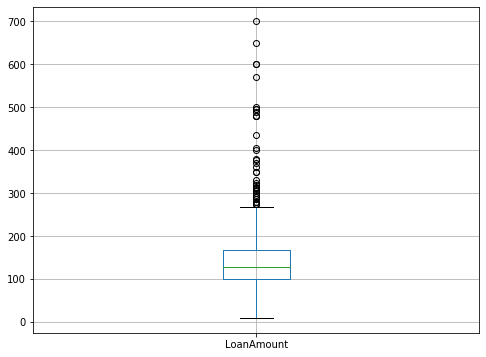

In [43]:
plt.figure(figsize = (8,6))
train.boxplot(column = 'LoanAmount')

In [44]:
# Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging.
# LoanAmount has missing and well as extreme values, while ApplicantIncome has a few extreme values,
# which demand deeper understanding. We will take this up in coming sections

In [45]:
# ----------------Categorical variables visualizations--------------

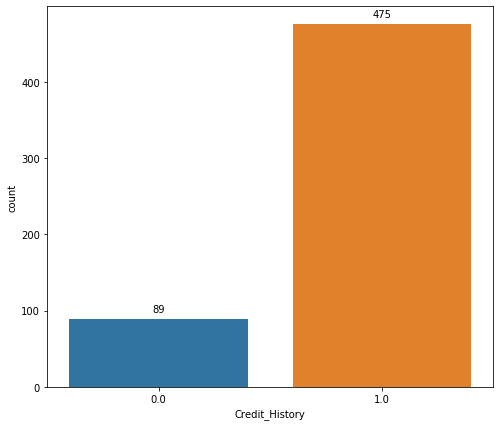

In [48]:
plt.figure(figsize = (8,7))
plot = sns.countplot(x = 'Credit_History',data = train)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [49]:
# Most applicants (475) had credit history

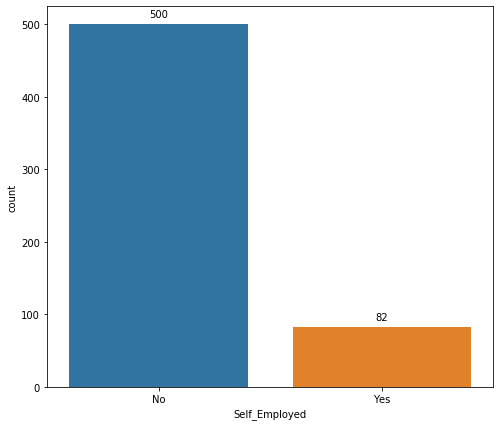

In [88]:
plt.figure(figsize = (8,7))
plot = sns.countplot(x = 'Self_Employed',data = train)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [85]:
# Most applicants are NOT ('NO') self-employed

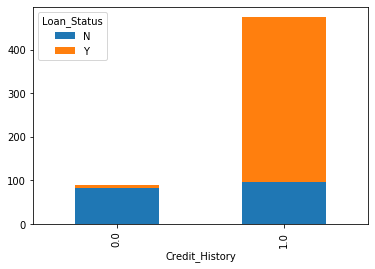

In [69]:
# Let's check the chances of getting a loan when you have valid credit history 
# using a stacked bar chart

credit_plot = pd.crosstab(train['Credit_History'], train['Loan_Status'])
credit_plot.plot(kind='bar', stacked=True)

In [58]:
# There's higher chances of getting a loan when an applicant has credit history

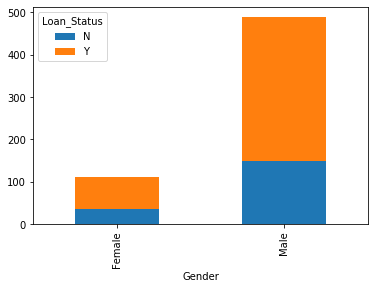

In [68]:
# Let's check the chance of getting loan for Males and Females

gender_plot = pd.crosstab(train['Gender'], train['Loan_Status'])
gender_plot.plot(kind='bar', stacked=True)

In [65]:
# Males had higher chances of getting a Loan than females

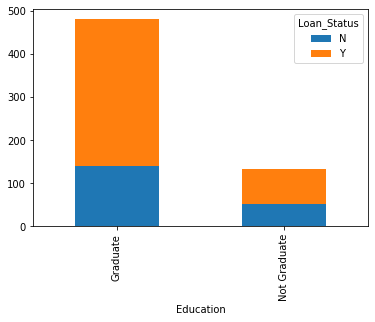

In [70]:
# chances of geeting a loan by Education status

edu_plot = pd.crosstab(train['Education'], train['Loan_Status'])
edu_plot.plot(kind='bar', stacked=True)

In [71]:
# Graduate applicants have higher chances of getting a loan than non-graduates

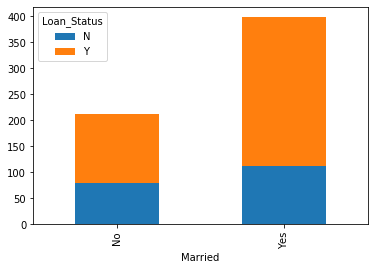

In [72]:
# chances of geeting a loan when Married or not

marital_plot = pd.crosstab(train['Married'], train['Loan_Status'])
marital_plot.plot(kind='bar', stacked=True)

In [73]:
# Married applicants tends to have higher chances of getting a loan

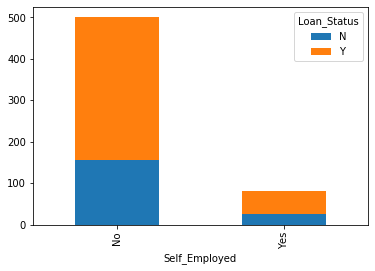

In [76]:
# chances of geeting a loan when Self-Employed or not

selfemployed_plot = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
selfemployed_plot.plot(kind='bar', stacked=True)

In [77]:
# Applicants that are NOT self-employed have higher chances of getting a loan

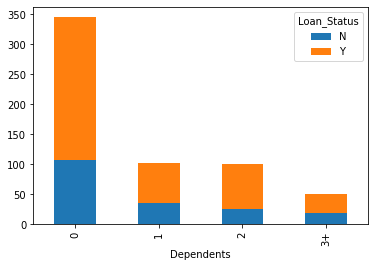

In [79]:
# chances of geeting a loan when Self-Employed or not

dependents_plot = pd.crosstab(train['Dependents'], train['Loan_Status'])
dependents_plot.plot(kind='bar', stacked=True)

In [80]:
# Applicants that have no dependants have higher chances of getting a loan
# The chances of getting a loan decreases as the number of dependents increases

In [83]:
#------------Data Munging / Data Cleaning-----------

  # During our exploration of the data, we found a few problems in the data set,missing values and outliers
# which needs to be solved before the data is ready for a good model

In [19]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [15]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [18]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [20]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)  
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [96]:
# --------------------Now let's deal with outliers / extreme values on LaonAmount and ApplicantIncome--------

#  Since the extreme values are practically possible, i.e. 
# some people might apply for high value loans due to specific needs. So instead of treating them as outliers, 
# let’s try a log transformation to nullify their effect:

train['LoanAmount_log'] = np.log(train['LoanAmount']) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [22]:
# Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. 
# So it might be a good idea to combine both incomes as total income and take a log transformation of the same

train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])

test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['TotalIncome_log'] = np.log(test['TotalIncome'])

In [31]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,1,4.852030,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,1,4.948760,8.699515


In [25]:
train=train.drop('Loan_ID',axis=1)
train=train.drop('TotalIncome',axis=1)
train=train.drop('LoanAmount',axis=1)
train=train.drop('CoapplicantIncome',axis=1)
train=train.drop('ApplicantIncome',axis=1)

test=test.drop('Loan_ID',axis=1)
test = test.drop('ApplicantIncome',axis = 1)
test = test.drop('CoapplicantIncome',axis = 1)
test = test.drop('TotalIncome',axis = 1)
test = test.drop('LoanAmount',axis = 1)

In [28]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 

train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [47]:
# Now it's time to use label encoding to covert categorical variables to binary

# First let's import all Machine Learning algorithms we'll need

from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn import preprocessing


#Classification Algorithms 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from xgboost import XGBClassifier

In [109]:
# Encode variables in train data

le = LabelEncoder()
train['Gender'] = le.fit_transform(train['Gender'])
train['Married'] = le.fit_transform(train['Married'])
train['Education'] = le.fit_transform(train['Education'])
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])
train['Self_Employed'] = le.fit_transform(train['Self_Employed'])
train['Property_Area'] = le.fit_transform(train['Property_Area'])

In [113]:
# Encode varibles for test data

test['Gender'] = le.fit_transform(test['Gender'])
test['Married'] = le.fit_transform(test['Married'])
test['Education'] = le.fit_transform(test['Education'])
test['Self_Employed'] = le.fit_transform(test['Self_Employed'])
test['Property_Area'] = le.fit_transform(test['Property_Area'])

In [138]:
# ------------------Now the data is ready for Machine learning model--------------

In [32]:
X = train.drop('Loan_Status',axis=1) 
y = train.Loan_Status

In [33]:
X = pd.get_dummies(X) 
train = pd.get_dummies(train) 
test = pd.get_dummies(test)

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=2000)

In [73]:
# Random Forest 

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)*100

83.78378378378379

In [74]:
# Logistic Regression

lm = LogisticRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)*100

85.94594594594595

In [49]:
# we have identified 85% of the loan status correctly.

In [92]:
xg = XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=5,colsample_bytree=1)
xg.fit(X_train,y_train)
xg.score(X_test,y_test)*100

82.16216216216216

In [41]:
# Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb.score(X_test,y_test)*100

80.0

In [42]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)*100

75.67567567567568

In [43]:
# Neural Network

nnt = MLPClassifier()
nnt.fit(X_train,y_train)
nnt.score(X_test,y_test)*100

70.8108108108108

In [44]:
# ------------Try to increase accuracy of models by using cross validation-------------

# CV for Logistic Reg

lm_cv = cross_val_score(lm, X_train, y_train, cv = 5)
lm_cv.mean()*100

80.41313269493845

In [45]:
# CV for Random Forest

rf_cv = cross_val_score(rf, X_train, y_train, cv = 5)
rf_cv.mean()*100

75.99452804377565

In [46]:
# CV for Gradient Boosting

gb_cv = cross_val_score(gb, X_train, y_train, cv = 5)
gb_cv.mean()*100

76.92202462380301

In [165]:
# --------------Summary of results---------

# All models accuaracy increased after using Cross validation
# With Logistic Regression having the highest accuaracy of 82%
# We select this model as the best model to predict Loan approval and the features
# important in predicting loan approval of an applicant

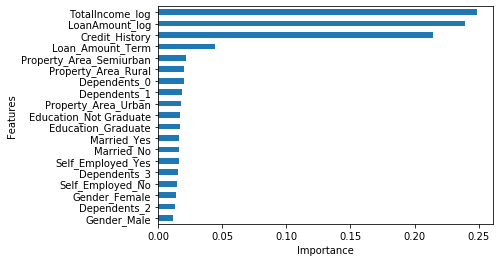

In [82]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(20).plot(kind='barh')
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [55]:
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}
gb_cv = GridSearchCV(lm, param_grid=param_grid, cv=5)

In [56]:
gb_cv.fit(X_train, y_train)
print('Best value of parameters:',gb_cv.best_params_)
print('Best score:',gb_cv.best_score_*100)

ValueError: Invalid parameter max_depth for estimator LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [83]:
y_final = rf.predict(test)

#Submission
submission = pd.DataFrame({
        "Loan_ID": Loan_ID["Loan_ID"],
        "Loan_Status": y_final
    })
submission.head()
submission.to_csv('Loan2.csv', index=False)

In [84]:
submission['Loan_Status']=y_final 
submission['Loan_ID']=Loan_ID['Loan_ID']

In [85]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [86]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic3.csv')